# 15-3. Molecular Motion:
Modify rw_visual.py by replacing ax.scatter() with ax.plot(). To simulate the path of a pollen grain on the surface of a drop of water, pass in the rw.x_values and rw.y_values, and include a linewidth argu- ment. Use 5,000 instead of 50,000 points to keep the plot from being too busy.

In [3]:
from random import choice

class RandomWalk:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points

        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:

            # Decide which direction to go, and how far to go.
            x_direction = choice([1, -1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue

            # Calculate the new position.
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)


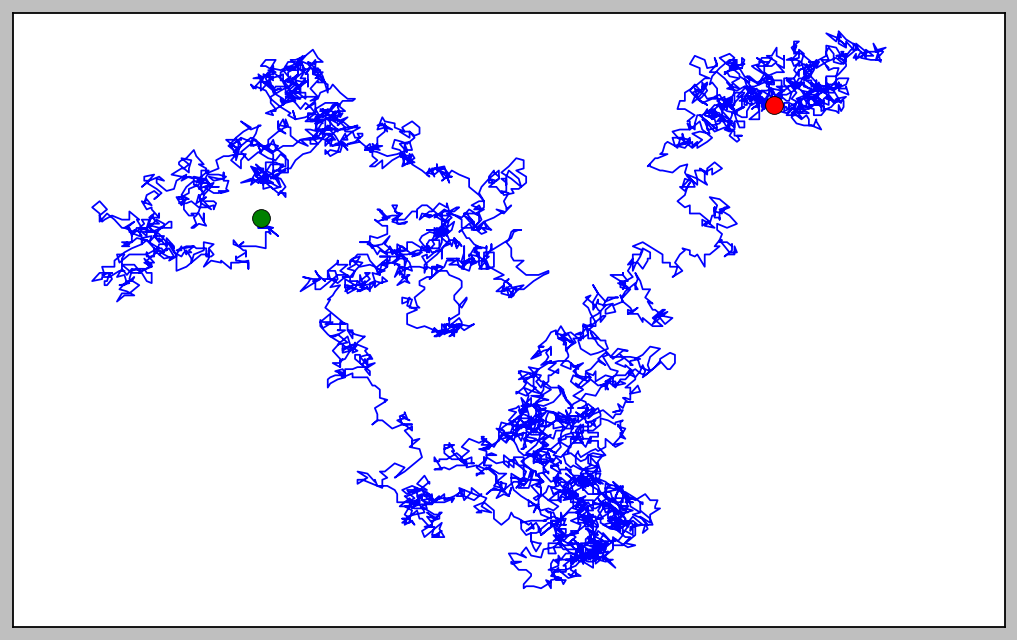

In [4]:
"""import matplotlib.pyplot as plt
while True:
      # Make a random walk.
      rw = RandomWalk(50_000)
      rw.fill_walk()

      # Plot the points in the walk.

      plt.style.use('classic')
      fig, ax = plt.subplots(figsize=(10, 6), dpi=128)
      point_numbers = range(rw.num_points)

      ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
                     edgecolors='none', s=1)

      ax.set_aspect('equal') 

      # Emphasize the first and last points.
      ax.scatter(0, 0, c='green', edgecolors='none', s=100)
      ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',
        s=100)
      # Remove the axes.
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      plt.show()
  """
import matplotlib.pyplot as plt

while True:
    # Make a random walk with 5,000 points.
    rw = RandomWalk(5_000)
    rw.fill_walk()

    # Plot the points in the walk.
    plt.style.use('classic')
    fig, ax = plt.subplots(figsize=(10, 6), dpi=128)

    # Plot the path of the random walk with a linewidth argument.
    ax.plot(rw.x_values, rw.y_values, linewidth=1, color='blue')

    # Emphasize the first and last points with different markers and colors.
    ax.plot(0, 0, 'go', markersize=10)  # Start point in green
    ax.plot(rw.x_values[-1], rw.y_values[-1], 'ro', markersize=10)  # End point in red

    # Remove the axes.
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the plot.
    plt.show()

    # Break out of the loop after one iteration for convenience.
    # Remove this line if you want the program to keep running.
    break



# 15-4. Modified Random Walks:
 In the RandomWalk class, x_step and y_step are generated from the same set of conditions. The direction is chosen randomly from the list [1, -1] and the distance from the list [0, 1, 2, 3, 4]. Modify the values in these lists to see what happens to the overall shape of your walks. Try a longer list of choices for the distance, such as 0 through 8, or remove the −1 from the x- or y-direction list.

In [5]:
from random import choice

class RandomWalk_1:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points

        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:

            # Experiment 1: Modify distance choices (0 through 8).
            x_direction = choice([1, -1])  # Keep the x-direction unchanged
            x_distance = choice(range(0, 9))  # Increase the distance range to 0 through 8
            x_step = x_direction * x_distance

            # Experiment 2: Remove -1 from y-direction choices.
            y_direction = choice([1])  # Restrict y-direction to only positive movement
            y_distance = choice(range(0, 9))  # Use the same distance range for y
            y_step = y_direction * y_distance

            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue

            # Calculate the new position.
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)


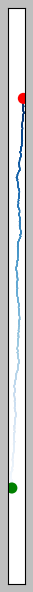

In [6]:
import matplotlib.pyplot as plt
while True:
      # Make a random walk.
      rw = RandomWalk_1()
      rw.fill_walk()

      # Plot the points in the walk.

      plt.style.use('classic')
      
      fig, ax = plt.subplots(figsize=(15, 9))
      point_numbers = range(rw.num_points)

      ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
                     edgecolors='none', s=1)

      ax.set_aspect('equal') 

      # Emphasize the first and last points.
      ax.scatter(0, 0, c='green', edgecolors='none', s=100)
      ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',
        s=100)
      # Remove the axes.
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      plt.show()

      break

# 15-5. Refactoring:
The fill_walk() method is lengthy. Create a new method called get_step() to determine the direction and distance for each step, and then calculate the step. You should end up with two calls to get_step() in fill_walk():
                  x_step = self.get_step()
                  y_step = self.get_step()
This refactoring should reduce the size of fill_walk() and make the method easier to read and understand.

In [7]:
from random import choice

class RandomWalk_2:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points

        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def get_step(self):
        """Determine the direction and distance for a step."""
        direction = choice([1, -1])  # Choose a direction
        distance = choice([0, 1, 2, 3, 4])  
        return direction * distance

    def fill_walk(self):
        """Calculate all the points in the walk."""
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:
            x_step = self.get_step()  # Get the x step
            y_step = self.get_step()  # Get the y step

            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue

            # Calculate the new position.
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)


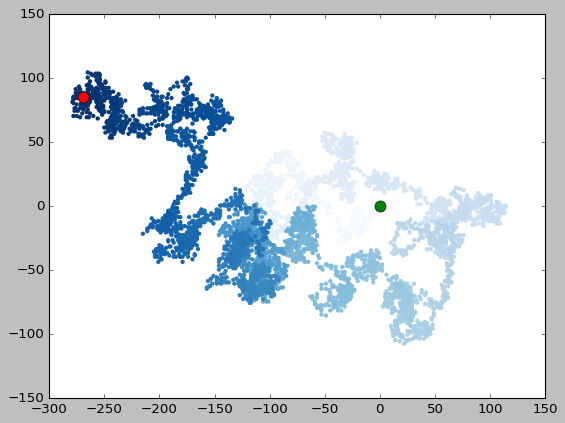

In [8]:
while True:
    # Make a random walk with 5,000 points.
    rw = RandomWalk_2(5_000)
    rw.fill_walk()

    # Plot the points in the walk.
    plt.style.use('classic')
    
    fig, ax = plt.subplots()
    point_numbers = range(rw.num_points)
    ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
          edgecolors='none', s=15)

    # Emphasize the first and last points with different markers and colors.
    ax.plot(0, 0, 'go', markersize=10)  # Start point in green
    ax.plot(rw.x_values[-1], rw.y_values[-1], 'ro', markersize=10)  # End point in red

   

    # Display the plot.
    plt.show()

    # Break out of the loop after one iteration for convenience.
    # Remove this line if you want the program to keep running.
    break